## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
from datetime import datetime

## Import Dataset

In [2]:
dir_path = 'D:\OneDrive - Chalmers\Git\EEN210_Applied_Digital_Health_temp\data\data_labeled'
files = glob.glob(os.path.join(dir_path , '*.csv'))

## Combine each file into data frame

In [3]:
dataset_all = []

# Columns to read from each file
columns_to_read = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'timestamp', 'label']

# Loop append each file
for file_path in files:
    df = pd.read_csv(file_path, index_col=None, header=0, usecols=columns_to_read)
    df['filename'] = os.path.splitext(os.path.basename(file_path))[0]
    dataset_all.append(df)
    print(os.path.splitext(os.path.basename(file_path))[0])

# Concatenate all data
dataset_all = pd.concat(dataset_all, axis=0, ignore_index=True)

fall_back_data_20240129_163134_labeled
fall_back_mew_data_20240129_165424_labeled
fall_front_data_20240129_163754_labeled
fall_front_mew_data_20240129_170336_labeled
fall_sideLeft_data_20240129_164741_labeled
fall_sideRight_data_20240129_164251_labeled
stairs_down_data_20240124_150347_labeled
stairs_down_data_20240124_152206_labeled
stairs_down_data_20240124_152408_labeled
stairs_down_data_20240124_152621_labeled
stairs_up_data_20240124_152108_labeled
stairs_up_data_20240124_152306_labeled
stairs_up_data_20240124_152516_labeled
standing_data_20240124_143101_labeled
standing_data_20240124_143514_labeled
standing_data_20240124_143747_labeled
walking_data_20240124_142045_labeled
walking_data_20240124_142333_labeled
walking_data_20240124_142757_labeled


## Investigate missing value

In [4]:
dataset_all['timestamp'].value_counts().sort_values(ascending = True)

timestamp
2024-01-29 17:04:27       1
2024-01-29 16:55:41       1
2024-01-29 16:56:31       1
2024-01-29 16:54:41       1
2024-01-29 16:32:16       1
                       ... 
2024-01-24 14:22       1013
2024-01-24 14:33       1024
2024-01-24 14:36       1049
2024-01-24 14:21       1049
2024-01-24 14:24       1049
Name: count, Length: 833, dtype: int64

In [5]:
np.unique(dataset_all['filename'])

array(['fall_back_data_20240129_163134_labeled',
       'fall_back_mew_data_20240129_165424_labeled',
       'fall_front_data_20240129_163754_labeled',
       'fall_front_mew_data_20240129_170336_labeled',
       'fall_sideLeft_data_20240129_164741_labeled',
       'fall_sideRight_data_20240129_164251_labeled',
       'stairs_down_data_20240124_150347_labeled',
       'stairs_down_data_20240124_152206_labeled',
       'stairs_down_data_20240124_152408_labeled',
       'stairs_down_data_20240124_152621_labeled',
       'stairs_up_data_20240124_152108_labeled',
       'stairs_up_data_20240124_152306_labeled',
       'stairs_up_data_20240124_152516_labeled',
       'standing_data_20240124_143101_labeled',
       'standing_data_20240124_143514_labeled',
       'standing_data_20240124_143747_labeled',
       'walking_data_20240124_142045_labeled',
       'walking_data_20240124_142333_labeled',
       'walking_data_20240124_142757_labeled'], dtype=object)

In [6]:
def rm_baseline(sig, nwin):    
    N = len(sig)
    idx = int((nwin-1)/2)

    sig = sig.values
    sig_norm = np.zeros(N)*np.nan
    
    # Remove baseline with mean
    for i in np.arange(N-idx):
        sig_win = sig[i:(i+nwin)]
        sig_mean = np.mean(sig_win)
        sig_norm[i+idx] = sig[i+idx]-sig_mean

    return sig_norm


In [7]:

def calFeat(dataset, nwin):
    # Calculate magnitude using Euclidean norm
    dataset['acc_magnitude'] = np.sqrt(dataset['acceleration_x']**2 +
                                    dataset['acceleration_y']**2 +
                                    dataset['acceleration_z']**2)

    dataset['gyr_magnitude'] = np.sqrt(dataset['gyroscope_x']**2 +
                                    dataset['gyroscope_y']**2 +
                                    dataset['gyroscope_z']**2)
    
    # Calculate time domain features
    dataset_new = dataset.rolling(window=nwin).agg(["sum", "mean", "std", "min", "max"])
    dataset_new.columns = [f"{col[0]}_{col[1]}" for col in dataset_new.columns]
    
    # Calculate freq domain features 
    

    return dataset_new

nwin_rm_baseline = 31 # = 1 sec (samplize rate = 20 Hz)
nwin_feat = 10
cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyroscope_x','gyroscope_y', 'gyroscope_z']

dataset_feat = pd.DataFrame()  # Initialize as an empty DataFrame
for fn in dataset_all['filename'].unique():

    # Get individual file
    dataset = dataset_all.loc[lambda df: df['filename']==fn, :]
    
    # Signal processing part
    dataset.loc[:,cols] = dataset[cols].apply(lambda x: rm_baseline(x, nwin_rm_baseline))
    
    # Feature extraction
    feat = calFeat(dataset[cols], nwin_feat)
    feat.loc[:,'label'] = dataset.loc[:,'label']
    feat.loc[:,'filename'] = dataset.loc[:,'filename']
    dataset_feat = pd.concat([dataset_feat, feat], ignore_index=True)
    
# Change timestamp to datetime if needed
# dataset_feat.loc[:, 'timestamp'] = pd.to_datetime(dataset_feat['timestamp'], format="%Y-%m-%d %H:%M:%S")

dataset_feat.head()

C:\Users\Mew\AppData\Local\Temp\ipykernel_14628\1979300559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['acc_magnitude'] = np.sqrt(dataset['acceleration_x']**2 +
C:\Users\Mew\AppData\Local\Temp\ipykernel_14628\1979300559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gyr_magnitude'] = np.sqrt(dataset['gyroscope_x']**2 +
C:\Users\Mew\AppData\Local\Temp\ipykernel_14628\1979300559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,acceleration_x_sum,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_max,acceleration_y_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_max,...,acc_magnitude_std,acc_magnitude_min,acc_magnitude_max,gyr_magnitude_sum,gyr_magnitude_mean,gyr_magnitude_std,gyr_magnitude_min,gyr_magnitude_max,label,filename
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standing,fall_back_data_20240129_163134_labeled
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standing,fall_back_data_20240129_163134_labeled
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standing,fall_back_data_20240129_163134_labeled
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standing,fall_back_data_20240129_163134_labeled
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,standing,fall_back_data_20240129_163134_labeled


In [109]:
temp = dataset_all.loc[lambda df: df['filename']=='standing_data_20240124_143514_labeled', :]
cols = ['acceleration_x', 'acceleration_y', 'acceleration_z']
sig = temp[cols] #['acceleration_x']

fs = 20;
npnts   = len(sig)
timevec = np.arange(npnts)/fs

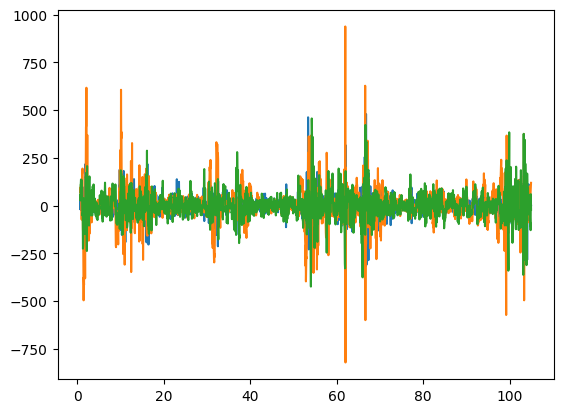

In [110]:
sig_rm = sig[cols].apply(lambda x: rm_baseline(x, 30))

plt.plot(timevec,sig_rm[cols[0]],label='Signal')
plt.plot(timevec,sig_rm[cols[1]],label='Signal')
plt.plot(timevec,sig_rm[cols[2]],label='Signal')
plt.show()

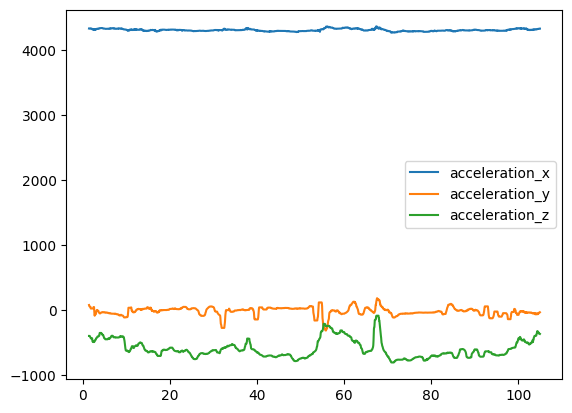

In [111]:

sig_mean = sig.rolling(window=30).agg(["median"])

plt.plot(timevec,sig_mean[cols[0]],label=cols[0])
plt.plot(timevec,sig_mean[cols[1]],label=cols[1])
plt.plot(timevec,sig_mean[cols[2]],label=cols[2])
plt.legend()
plt.show()


In [131]:
from scipy import signal
from scipy.fftpack import fft

def get_psd(df, fs, window="hann"):
    f_psd, df_psd = signal.welch(df, fs, window=window)
    # df_psd = pd.DataFrame(psd, columns=df.columns)
    # df_psd["Frequency_Hz"] = f
    # df_psd = df_psd.set_index("Frequency_Hz")
    return f_psd, df_psd

# power spectrum of signal
def get_fft(df, fs):
    nfft = 2**16
    df_fft = fft(df, nfft)
    df_fft = 2*np.abs(df_fft[0:nfft//2]/nfft)
    f_fft = np.linspace(0,fs/2,int(np.floor(nfft/2)))
    return f_fft, df_fft

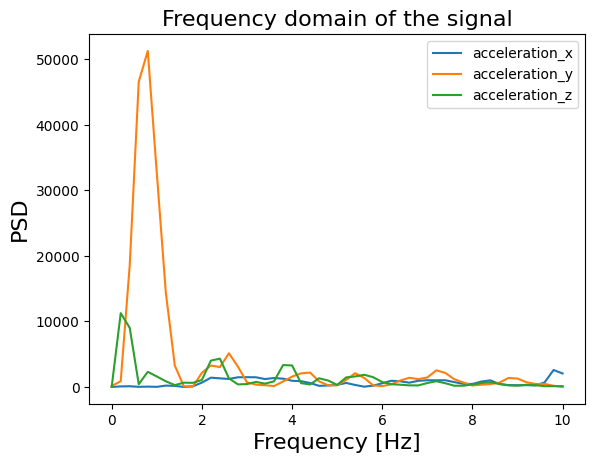

In [133]:
nwin = 100

for c in cols :

    sig = temp[c].values
    sig = sig[0:int(nwin)]
    fs = 20
    
    f_values, psd_values = get_psd(sig, fs)
    
    plt.plot(f_values, psd_values, linestyle='-', label=c)
    
plt.xlim([0,10])
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('PSD', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.legend()
plt.show()


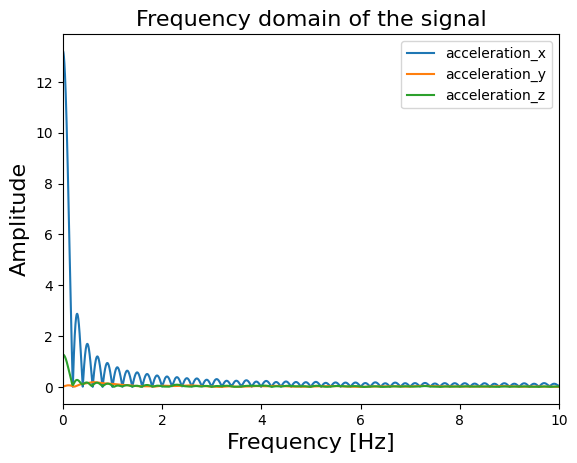

In [130]:
for c in cols :

    sig = temp[c].values
    sig = sig[0:int(nwin)]
    fs = 20

    f_values, fft_values = get_fft(sig, fs)
    
    plt.plot(f_values, fft_values, linestyle='-', label=c)
    
plt.xlim([0,10])
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.legend()
plt.show()


In [ ]:
from scipy import signal
import scipy

sig = temp['acceleration_x'].values
npnts = len(sig)

fs = 20

t = np.linspace(0,(npnts-1)/fs,npnts)
t_intpl = np.linspace(0,(npnts-1)/fs,5*npnts)

def interp0(x, xp, yp):
    """Zeroth order hold interpolation w/ same
    (base)   signature  as numpy.interp."""

    def func(x0):
        if x0 <= xp[0]:
            return yp[0]        
        if x0 >= xp[-1]:
            return yp[-1]        
        k = 0
        while x0 > xp[k]:
            k += 1
        return yp[k-1]
    
    if isinstance(x,float):
        return func(x)
    elif isinstance(x, list):
        return [func(x) for x in x]
    elif isinstance(x, np.ndarray):
        return np.asarray([func(x) for x in x])
    else:
        raise TypeError('argument must be float, list, or ndarray')
    
sig_intpl = interp0(t_intpl, t, sig)

# plot
plt.scatter(t,sig)
plt.plot(t_intpl,sig_intpl,'r')
plt.xlim([t_intpl.min(),t_intpl.max()])
plt.title('Zero Order Hold/Interpolation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Signal','ZOH'])


In [ ]:
# def LP_filter(signal):
# low pass filter
fs = 20
npnts = len(sig)

fcutoff = 0.3
transw  = 0.1
order   = np.round(1.5*fs/fcutoff )+1

shape   = [ 1,1,0,0 ]
frex    = [ 0, fcutoff, fcutoff+(fcutoff*transw), fs/2 ]

hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=fs)

# its power spectrum
filtkernX = np.abs(scipy.fftpack.fft(filtkern,npnts))**2

plt.plot(np.array(frex),shape,'r')
plt.plot(hz,filtkernX[:len(hz)],'k')
plt.xlim([0,2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Filter kernel spectrum')
plt.show()

# plot the data
yFilt = signal.filtfilt(filtkern,1,sig)

plt.plot(t,sig,label='Signal')
plt.plot(t,yFilt,label='Filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
filtkern

In [ ]:
def map_label_to_new_category(label):
    if 'fall' in str(label):
        return 'falling'
    elif 'walking' in str(label):
        return 'walking'

    elif 'standing' in str(label):
        return 'standing'
    else:
        return 'other'

# Apply the function to create a new label column
dataset_feat['simple_label'] = dataset_feat['label'].apply(map_label_to_new_category)

dataset_feat.head(100)

In [ ]:
# # Calculate feature group by timestamp
# dataset_feat = dataset.groupby('timestamp').agg({
#     'acceleration_x': ['mean', 'std'],
#     'acceleration_y': ['mean', 'std'],
#     'acceleration_z': ['mean', 'std'],
#     'acc_magnitude': ['mean', 'std'],
#     'gyroscope_x': ['mean', 'std'],
#     'gyroscope_y': ['mean', 'std'],
#     'gyroscope_z': ['mean', 'std'],
#     'gyr_magnitude': ['mean', 'std']
# })
# dataset_feat.columns = [f"{col[0]}_{col[1]}" for col in dataset_feat.columns]

# # Display the grouped result
# dataset_feat.head()

In [ ]:
# # Sort table by timestamp
# timestamp_sorted = dataset['timestamp'].sort_values(ascending=True)

# # Extract the first and last timestamps
# timestamp_str = timestamp_sorted.head(1).iloc[0]
# timestamp_end = timestamp_sorted.tail(1).iloc[0]

# # Create df with timestamp range from strat to end time
# df_timestamp = pd.DataFrame({'timestamp': pd.date_range(start=timestamp_str, end=timestamp_end, freq='S')})
# df_timestamp.head()

In [ ]:
# # Merge table with df_timestamp (1 sec resolution)
# df = pd.merge(df_timestamp, dataset_feat, on='timestamp', how='left')
# print(df)

In [ ]:
# # Count null in df
# null_counts = df.isnull().sum()

# # Display the count of null values in each column
# print(null_counts)

In [ ]:
dataset_feat_long = pd.melt(dataset_feat, 
                            id_vars=['simple_label','label'],
                            value_vars=["acc_magnitude_mean","acc_magnitude_std", "gyr_magnitude_mean","gyr_magnitude_std"], 
                            var_name='feat', 
                            value_name='val')

dataset_feat_long = dataset_feat_long.dropna()

In [ ]:
import plotnine
from plotnine import *

ggplot(dataset_feat_long, aes(x='feat', y='val', fill='simple_label'))+geom_boxplot()+theme(axis_text_x  = element_text(angle = 90, hjust = 1))

## Adjust baseline

In [ ]:
df = dataset_all[dataset_all['filename']=='fall_back_data_20240129_163134_labeled']
df.head()

In [ ]:
import scipy.io as sio
import scipy.signal
from scipy import *
from scipy import signal

# generate signal from Fourier coefficients, and add noise
fs = 20
df_sig = df['acceleration_x'].dropna().values

N = len(df_sig)
hz = np.linspace(0,fs,N)
time = np.arange(0,N)/fs

### plot the data
plt.plot(time,df_sig)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data = noised signal')
plt.show()

# plt.plot(hz,np.abs(scipy.fftpack.fft(df_sig)/N)**2,label='signal')
# plt.legend()
# plt.xlim([0,0.3])
# plt.title('Frequency domain representation of signal and noise')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power')
# plt.show()

In [ ]:
temp = calFeat(df_sig)

plt.plot(temp['acc_magnitude_std'])
plt.plot(temp['gyr_magnitude_std'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data = magnitude')

In [ ]:
# nwin = 11
# idx = int((nwin-1)/2)

# sig = df_sig['acceleration_x'].dropna().values
# N = len(sig)
# sig_norm = np.zeros(N)
# for i in np.arange(N-idx):
#     sig_win = sig[i:(i+nwin)]
#     sig_mean = np.mean(sig_win)
#     sig_norm[i+idx] = sig[i+idx]-sig_mean
#     # print( sig_norm[i+idx])

In [ ]:
plt.plot(df_sig['acceleration_x'], label='acceleration_x')
plt.plot(df_sig['acceleration_y'], label='acceleration_y')
plt.plot(df_sig['acceleration_z'], label='acceleration_z')

plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Data = ACC')
plt.legend()
plt.show()

In [ ]:
# Plotting Mean: 'acc_x', 'acc_y', 'acc_z' against 'timestamp'
plt.figure(figsize=(10, 6))

plt.plot(df['acceleration_x_mean'], label='acceleration_x')
plt.plot(df['acceleration_y_mean'], label='acceleration_y')
plt.plot(df['acceleration_z_mean'], label='acceleration_z')
# plt.plot(df['acc_magnitude_mean'], label='magnitude')

plt.title('Mean Acceleration over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [ ]:
# Plotting SD: 'acc_x', 'acc_y', 'acc_z' against 'timestamp'
plt.figure(figsize=(10, 6))

plt.plot(df['acceleration_x_std'], label='acceleration_x')
plt.plot(df['acceleration_y_std'], label='acceleration_y')
plt.plot(df['acceleration_z_std'], label='acceleration_z')

plt.title('SD Acceleration over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [ ]:
# Plotting Mean: 'gyr_x', 'gyr_y', 'gyr_z' against 'timestamp'
plt.figure(figsize=(10, 6))

plt.plot(df['gyroscope_x_mean'], label='gyroscope_x')
plt.plot(df['gyroscope_y_mean'], label='gyroscope_y')
plt.plot(df['gyroscope_z_mean'], label='gyroscope_z')

plt.title('Gyroscope over Time')
plt.xlabel('Timestamp')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

In [ ]:
# Plotting Raw: 'acc_x', 'acc_y', 'acc_z' against 'timestamp'
plt.figure(figsize=(10, 6))

plt_range = range(1000)
plt.plot(dataset['acceleration_x'][plt_range], label='acceleration_x')
plt.plot(dataset['acceleration_y'][plt_range], label='acceleration_y')
plt.plot(dataset['acceleration_z'][plt_range], label='acceleration_z')
plt.plot(dataset['acc_magnitude'][plt_range], label='magnitude')

plt.title('Acceleration over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [ ]:
# Plotting Raw: 'gyr_x', 'gyr_y', 'gyr_z' against 'timestamp'
plt.figure(figsize=(10, 6))

plt_range = range(1000)
plt.plot(dataset['gyroscope_x'][plt_range], label='gyroscope_x')
plt.plot(dataset['gyroscope_y'][plt_range], label='gyroscope_y')
plt.plot(dataset['gyroscope_z'][plt_range], label='gyroscope_z')

plt.title('Gyroscope over Time')
plt.xlabel('Timestamp')
plt.ylabel('Gyroscope')
plt.legend()
plt.show()

In [ ]:
dataset_feat.isna().sum()

In [ ]:
data = dataset_feat.dropna()

In [ ]:
data = data[data["simple_label"].isin(["falling", "walking", "standing"])]
X = data.drop(['label','simple_label','filename'], axis=1)
y = data['simple_label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
cols_feat = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=10)

# Train the classifier on the training set
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#report
classification_report_str = classification_report(y_test, y_pred)
print(classification_report_str)

## Visualize prediction

In [ ]:
x_temp = data
x_temp['pred'] = classifier.predict(sc.transform(X))

x_temp2 = pd.melt(x_temp,
                  id_vars=['pred','filename'],
                  value_vars=["acc_magnitude_mean","acc_magnitude_std", "gyr_magnitude_mean","gyr_magnitude_std"], 
                  var_name='feat', 
                  value_name='val')

for fn in x_temp['filename'].unique():
    x_temp_ind = x_temp.loc[lambda df: df['filename']==fn, :]
    t = np.arange(len(x_temp_ind))/20 #sec
    p = ggplot(x_temp_ind, aes(x=t, y='acc_magnitude_mean', color='pred'))+geom_point()+facet_wrap('filename', scales='free')
    print(p)

In [ ]:
data.columns

In [ ]:
# Plot distribution of points by Students 
dataset_feat.groupby('simple_label')['acc_magnitude_std'].plot(kind='hist', alpha=0.5, density=True)

# Add legend to plot
plt.legend(dataset_feat['label'].unique(), title='acc_magnitude_mean')

# Add x-axis label
plt.xlabel('Marks') 
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Group data by 'simple_label'
grouped_data = dataset_feat.groupby('simple_label')

# Plot scatter plot for each group
for label, group in grouped_data:
    # plt.scatter(group['acc_magnitude_mean'], group['gyr_magnitude_mean'], label=label, alpha=0.4)
    # plt.scatter(group['acc_magnitude_std'], group['gyr_magnitude_std'], label=label, alpha=0.4)
    plt.scatter(group['acc_magnitude_sum'], group['gyr_magnitude_sum'], label=label, alpha=0.4)

# Add legend to plot
plt.legend(title='Simple Label')

# Add labels
plt.xlabel('Mean of acc_magnitude')
plt.ylabel('Standard Deviation of acc_magnitude')

# Show plot
plt.show()
